In [1]:
import bt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [45]:
data = bt.get('RSP,IWY,MOAT,PFF,VNQ,NVDA', start='2020-01-01',end='2024-06-18')

[*********************100%%**********************]  1 of 1 completed


In [46]:
data

,rsp,iwy,moat,pff,vnq,nvda
Date,,,,,,
2020-01-02,107.571930,94.761292,52.765423,29.946001,78.295708,5.973633
2020-01-03,106.960136,94.083794,52.459980,30.009359,78.782402,5.878020
2020-01-06,107.099190,94.654839,52.631794,29.985594,78.876328,5.902669
2020-01-07,107.006470,94.451584,52.650887,29.946001,77.996880,5.974131
2020-01-08,107.321625,95.187126,52.755875,29.977684,78.235954,5.985335
...,...,...,...,...,...,...
2024-06-11,164.320007,208.649994,86.269997,31.379999,82.940002,120.910004
2024-06-12,165.199997,211.539993,86.570000,31.559999,83.680000,125.199997
2024-06-13,164.729996,212.809998,85.949997,31.559999,84.019997,129.610001


<Axes: title={'center': 'Equity Progression'}>

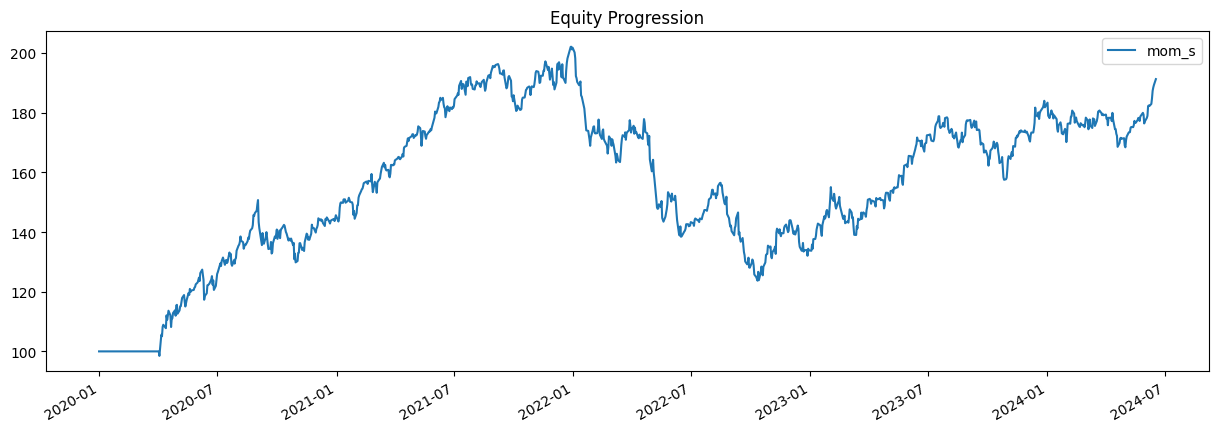

In [39]:
mom_s = bt.Strategy('mom_s', [bt.algos.RunDaily(),
                                 bt.algos.SelectAll(),
                                 bt.algos.SelectMomentum(1),
                                 bt.algos.WeighEqually(),
                                 bt.algos.Rebalance()],
                       ['rsp', 'iwy','moat','pff','vnq'])
mom_s_t = bt.Backtest(mom_s, data)
mom_s_t_r = bt.run(mom_s_t)
mom_s_t_r.plot()

In [52]:
parent = bt.Strategy('mix', [bt.algos.RunWeekly(),
                                   bt.algos.SelectAll(),
                                   bt.algos.WeighEqually(),
                                   bt.algos.Rebalance()],
                        [mom_s, 'nvda'])

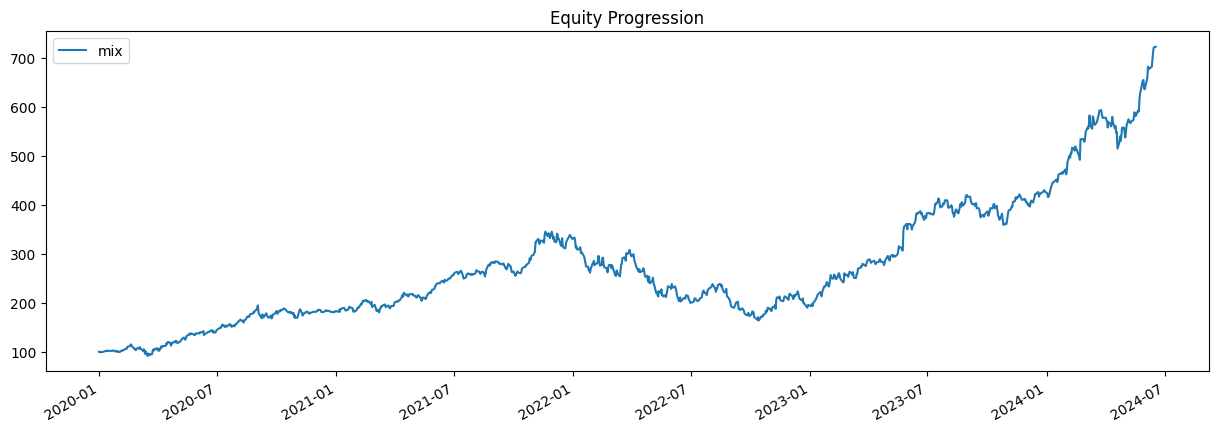

In [53]:
t = bt.Backtest(parent, data)
r = bt.run(t)
r.plot();

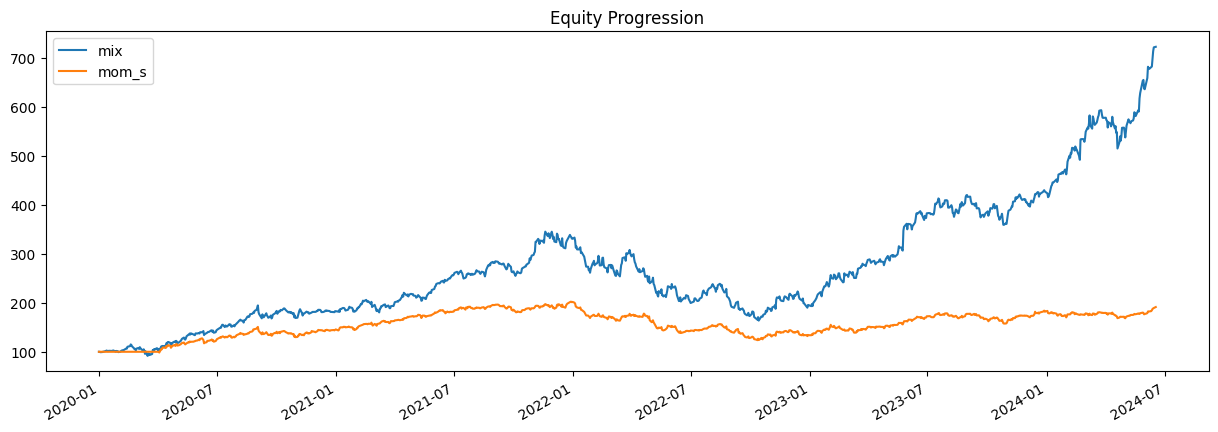

In [54]:
res2 = bt.run(t, mom_s_t)
res2.plot();